# Project 1: First steps in Machine Learning (70 Points)
In this project, you will train and evaluate your first machine learning models. We provide a structure with a lot of **TODO**s guiding you through the work. Please read the following information carefully.

## Grading
You can gain a total of 70 points in this project.

Please follow the **TODO**s in this notebook. There are practical and theoretical tasks to do.<br>
When working on the tasks please consider the following information:
* write short texts in **full sentences** answering the **TODO**s. Note, that points are given primarily for reporting and analyzing results (assuming you provide the code to reproduce these results). 
* have a look at all imports in this notebook; they already define which method you should use


## Organizational and Deadline
On Monday, **November 11th**, there will be a Q&A session in the tutorials! Start to work on this project **from now on** and take the offer to resolve any remaining ambiguity.
This assignment is due on **November 19th**. Please upload your solution to the Moodle as an ipynb-file.<br>
For a submission you need to be part of an assignment group.

# Part 1: Training your first models

## 1a) kNN - Classifier

In [9]:
import numpy as np
from fontTools.misc.cython import returns

# load dataset_1.npz
# the data and labels are saved in X and y, respectively
data_set = np.load('C:\\Users\\pauls\\PycharmProjects\\Machine_Learning\\project_1\\dataset_1.npz')
X = data_set['X']
y = data_set['y']

### The first dataset

**TODO:** Take a closer look at the dataset, e.g. number of samples, dimensionality, labels, etc.

In [16]:
num_samples, num_features = X.shape
num_labels = y.shape[0]
unique_labels = np.unique(y)

print(f"Number of samples: {num_samples}")
print(f"Number of features per sample: {num_features}")
print(f"Number of labels: {num_labels}")
print(f"Unique labels in the dataset: {unique_labels}")
print(f"Data type of X: {X.dtype}")
print(f"Data type of y: {y.dtype}")


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print()
print("First entries of X:\n", X[:5])
print()
print("First entries of y:\n", y[:5])

Number of samples: 800
Number of features per sample: 2
Number of labels: 800
Unique labels in the dataset: [0 1]
Data type of X: float64
Data type of y: int64
Shape of X: (800, 2)
Shape of y: (800,)

First entries of X:
 [[-9.90563823 -2.0449525 ]
 [ 7.34236575 11.11383874]
 [11.80651259 -3.90171984]
 [ 5.89950613  2.43333158]
 [-6.18872749 -9.48871318]]

First entries of y:
 [0 0 0 1 0]


### Splitting the data

For the first part of the exercise, use this data split:

In [15]:
n_train = int(0.7*X.shape[0]) # 70% sample
n_test_val = int(0.15*X.shape[0]) # 15% sample of as test and val

X_train = X[:n_train] # select first 70%
y_train = y[:n_train] # corresponding labels from above

X_test = X[n_train:n_train+n_test_val] # test values from n to n + n_test_val
y_test = y[n_train:n_train+n_test_val] # again labels

X_val = X[n_train+n_test_val:] # validation vals from n + n_test_val to end
y_val = y[n_train+n_test_val:] # l

**TODO**: Train and evaluate a kNN classifier with k=3 and report the model's accuracy on the train, validation and test set. Use the data as splitted above.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_1a = KNeighborsClassifier(n_neighbors=3)
knn_1a.fit(X_train, y_train)

y_train_pred = knn_1a.predict(X_train)
y_val_pred = knn_1a.predict(X_val)
y_test_pred = knn_1a.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {round(train_accuracy, 4)}")
print(f"Validation Accuracy: {round(val_accuracy, 4)}")
print(f"Test Accuracy: {round(test_accuracy, 4)}")

Training Accuracy: 0.9554
Validation Accuracy: 0.9083
Test Accuracy: 0.875


**TODO:** Report your results. Are there difference in the train/validation/test accuracy? Why? Does the model perform well on the dataset?

>**Answer:**
> - The training accuracy of 95.5% is fairly high, which indicates that the model fits the dataset well
> - The validation accuracy of 90.8% is also high, which means that the model works well with unseen data
> - The test accuracy of 87.5% is a bit lower, which indicates that the model does not perform well on the test data
>
>
>These accuracy differences can occur due to many different reasons. Some could be overfitting (for small k like 3), difference in data distribution (like edge cases and noisy data) and also the size of the data. While our train data contains 70% of the entire data set, both the validation and test data are only based on 15% each.
>
>
>Overall does the kNN classifier perform pretty good on the data, even though we can see a decrease in performance. 
>This means that the kNN model still needs some tuning to be able to work better on the given data.

**TODO**: Train and test the kNN classifier for different values of k on dataset 1.
- Use the train set to train the classifier and the validation set to evaluate the performance.
- Plot the validation accuracy for different values of k. Choose all possible values for k.
- Finally train the kNN classifier with the optimal k and report the accuracy on the test set.

In [72]:
accuracies = []
#k_list = []

#choose only odd k due to binary classification, as seen above from y_label
max_k = X_train.shape[0]


for k in range(1, max_k+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
        
    y_train_pred_1 = knn.predict(X_train)
    y_val_pred_1 = knn.predict(X_val)
        
    val_accuracy_1 = accuracy_score(y_val, y_val_pred_1)
        
    accuracies.append(val_accuracy_1)

#for k in range(1, max_k+1):
#    if k % 2 != 0:
#        knn = KNeighborsClassifier(n_neighbors=k)
#        knn.fit(X_train, y_train)
#        
#        y_train_pred_1 = knn.predict(X_train)
#        y_val_pred_1 = knn.predict(X_val)
#        
#        val_accuracy_1 = accuracy_score(y_val, y_val_pred_1)
#        
#        k_list.append(k)
#        accuracies.append(val_accuracy_1)

#### Plotting

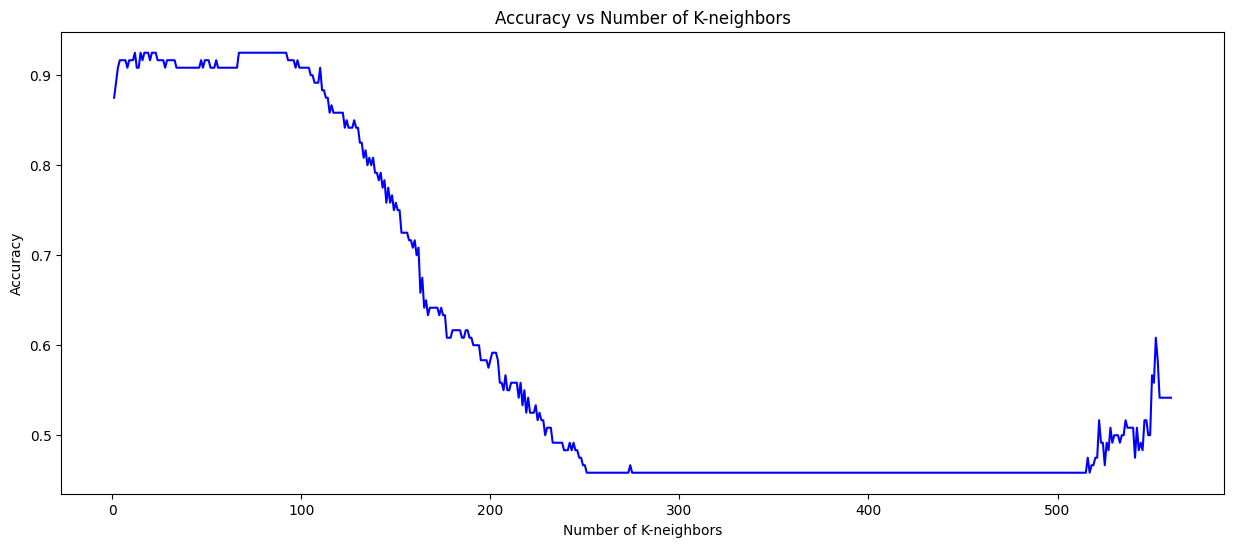

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
#plt.plot(k_list, accuracies, color="b")
plt.plot(range(1, max_k+1), accuracies, color="b")
plt.title("Accuracy vs Number of K-neighbors")
plt.xlabel("Number of K-neighbors")
plt.ylabel("Accuracy")
plt.show()

In [85]:
# first one
optimal_k_list = []
#optimal_k = 2 * (accuracies.index(max(accuracies))) + 1 # compensate only odd k from before
optimal_k = accuracies.index(max(accuracies))

for k_opt in accuracies:
    if k_opt == max(accuracies):
        optimal_k_list.append(accuracies.index(k_opt))

print(f"List of all optimal k's: ")
print(optimal_k_list)

print(f"Optimal number of K-neighbors: {optimal_k}")

List of all optimal k's: 
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
Optimal number of K-neighbors: 11


In [82]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

y_test_pred_opt = knn_optimal.predict(X_test)
test_accuracy_opt = accuracy_score(y_test, y_test_pred_opt)

print(f"Test accuracy with optimal k = {optimal_k}: {round(test_accuracy_opt, 4)}")

List of all optimal k's: 
[]
Test accuracy with optimal k = 11: 0.925


**TODO:** Answer the following questions in a **full text**.

* Describe your choice of values of k. Why did you choose them?
> ...
* For which values of k does the model perform best? How did you determine this?
> ...
* Would this value perform best on another dataset as well? Why/ Why not?
> ...
* What is the smallest and the greatest possible value for k? What would happen if we would choose these special values?
> ...

## 1b) Logistic Regression
Let's try another model as well. We will use the same dataset and split as before.

**TODOs**: 
- Train and evaluate logistic regression on the given split of dataset 1. Report the train, test and validation accuracy.
- Plot the dataset and decision boundary (own implementation, see lecture slides 53/54 in slides1.pdf) where the decision boundary is optimized on the complete dataset (X).
- Based on the accuracy and plot, answer the question below.

In [ ]:
#from sklearn.linear_model import LogisticRegression



**TODO:** How does Logistic Regression perform on this dataset? How does this relate to the properties of the model and the dataset? Answer in full sentences.
>...

## Polynomial Preprocessing

To achieve better performance, we apply polynomial preprocessing before fitting logistic regression. This can be done by constructing a pipeline as shown below.

**TODO:** Optimize the polynomial degree and plot the performance for different values of `degree`. Choose reasonable values of `degree`.  
* <font color='red'>Important: </font> Pass only one degree to PolynomialFeatures (not a tuple (min,max)) at each time and validate the whole pipeline! Remember to use the train set for training and the validation set to determine the optimal polynomial degree.



In [ ]:
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import Pipeline

#estimators = [('poly', PolynomialFeatures(degree=1)), ('clf', LogisticRegression(max_iter=10000))]
#pipe = Pipeline(estimators)



**TODO:** Given the best polynomial degree, train your model again, report the test accuracy and plot the decision boundary.

- Here you can use plot_2d_decisionboundary() from utils.py (see the following import), because plotting the decision boundary with preprocessing is more complicated.
Instead of calculating the decision boundary exactly, the function uses a grid-based approach, where each (x,y) position in the plot is colored according to the prediction of the estimator given (x,y).

**TODO:** Report your results. Answer the following questions in full sentences.

* What degrees did you try out and why?  
> ...

* For what degree does the pipeline perform best?  
> ...

* Would this polynomial degree also perform best on another dataset?  
> ...

## 1c) Comparing kNN and Logistic Regression
We want you to compare the kNN, logistic regression (without preprocessing) and polynomial regression (logistic regression with polynomial preprocessing). Use the previous dataset (dataset_1.npz) and dataset_2_a.npz.

**TODO:** Compare the performance of the kNN, Logistic Regression and Polynomial Regression. You can skip the hyperparameter tuning and use the best k and polynomial degree from before. Therefore, a simple train-test split is sufficient (e.g. 70:30)
- compare the accuracies of the three models/pipelines
- plot the decision boundaries (feel free to use plot_2d_decisionboundary())

In [ ]:


def train(dataset):
    """
    Train kNN & Log.Reg. on a given dataset and plot the dataset as well as the
    model's decision boundary
    
    Params:
        dataset: name of the datase
    
    Examples:
        train('dataset_1')
    """
    
    
    pass # TODO

In [ ]:
train("public/dataset_1")

In [ ]:
train("public/dataset_2_a")

**TODO:** Describe your results and analyze them: Which model(s) perform(s) best on dataset 1 and 2? Is there a difference in the datasets causing this behavior? Take the classifier properties into account.

> ...

# Part 2: Model evaluation

Consider the following scenario: Two groups of students work on this assignment. They both use the function below to generate a train-test split and compare the performance of kNN and Logistic Regression. For simplicity you can ignore hyperparameter tuning and use `k=5` and `deg=2`. However both groups achieve different results. The code snippet below shows how they handled the comparison.

In [ ]:
data_set = np.load('public/dataset_2_b.npz')
X = data_set['X']
y = data_set['y']

n = X.shape[0]

def group1_eval():
    print("group1:")
    n_train = int(4*n/5)
    X_train = X[:n_train]
    X_test = X[n_train:]
    y_train = y[:n_train]
    y_test = y[n_train:]
    
    # TODO: train and evaluate a kNN classifier with k=5 and report the accuracy

    
    # TODO:train and evaluate a logistic regression pipeline with polynomial preprocessing

    
    
def group2_eval():
    print("group2")
    n_test = int(n/5)
    X_train = X[n_test:]
    X_test = X[:n_test]
    y_train = y[n_test:]
    y_test = y[:n_test]
    
    # TODO:train and evaluate a kNN classifier with k=5 and report the accuracy

    
    # TODO train and evaluate a logistic regression pipeline with polynomial preprocessing
    
    
group1_eval()
group2_eval()

**TODO:** Explain why they achieve different results. Can you think of any better strategy than the simple train-test split to make the results more comparable? Feel free to add some code to underline your points or show your recommended approach.

* What do you think, whose results are correct?
> ...
* How could they improve their evaluation to be more confident about the results? (hint: If we make a statement like classifier 1 outperforms classifier 2 on this dataset, the statement should be representative for the whole dataset. As always, efficient solutions are preferable!)
> ...

**TODO:** Implement your recommended approach.

# Part 3: Yet another Dataset

**TODO:** Load dataset 3. Train and report the accuracy for kNN and logistic regression (without polynomial preprocessing).
You may use a simple train-test split or the strategy you proposed in part 2.

In [ ]:
data_set = np.load('public/dataset_3.npz')
X = data_set['X']
y = data_set['y']

**TODO:** Report the accuracy for each class. This can be done, by computing the accuracy score only on samples that belong to class i.

**TODO:** Describe your results and analyze them: Do you observe any problematic behavior?
> ...

**TODO:** Analyze the dataset. Focus on possible reasons for the above mentioned problems. Consider using plots to visualize the dataset's properties.

**TODO:** Discuss the properties of the dataset and how they influence the performance of the classifiers.

> ...

**TODO:** Given your results and the properties of the data, reflect on accuracy (over all classes) as a metric. Propose another metric that would be better suited for this kind of dataset and explain why. Adjustments to accuracy are fine, too.


> ...